In [1]:
# _*_ coding: utf-8 _*_
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
import matplotlib

def create_station_mapping(station_data):
    station_map = station_info[['station_id', 'landmark']].set_index('station_id').to_dict()
    return station_map

station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'


def summarise_data(trip_in, station_data, trip_out):
    with open(trip_out, 'w') as f_out:
    # configura o objeto de escrita de csv
        out_colnames = ['duration', 'start_date', 'start_year', 'start_month', 'start_hour', 'weekday', 'start_city', 'end_city', 'subscription_type']
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()

        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # configura o leitor do csv
                trip_reader = csv.DictReader(f_in)

                # processa cada linha lendo uma a uma
                for row in trip_reader:
                    # print row
                    # break
                    new_point = {}
                    # converte a duração de segundos para minutos.
                    ### TODO: Pergunta 3a: Adicione uma operação matemática       ###
                    ### para converter a duração de segundos para minutos.  ###
                    # str_min = str(divmod(int(row['Duration']), 60)[0]) + ':' + str(divmod(int(row['Duration']), 60)[1])
                    # new_point['duration'] = str_min #datetime.strptime(str_min, '%M:%S')
                    new_point['duration'] = float(row['Duration'])/60
                    # reformate strings com datas para múltiplas colunas
                    ### TODO: Pergunta 3b: Preencha os __ abaixo para criar os        ###
                    ### campos experados nas colunas (olhe pelo nome da coluna) ###
                    trip_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_date.date() #'{:2d}/{:2d}/{:4d}' .format(trip_date.day, trip_date.month, trip_date.year)
                    new_point['start_year']  = trip_date.year
                    new_point['start_month'] = trip_date.month
                    new_point['start_hour']  = trip_date.hour #'{:2d}:{:2d}'  .format(trip_date.hour, trip_date.minute)
                    new_point['weekday']     = trip_date.strftime("%A")

                    # TODO: mapeia o terminal de inicio e fim com o a cidade de inicio e fim
                    new_point['start_city'] = row['Start Station']
                    new_point['end_city'] = row['End Station']
                    # TODO: existem dois nomes diferentes para o mesmo campo. Trate cada um deles.
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # escreve a informação processada para o arquivo de saída.
                    trip_writer.writerow(new_point)



station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# Esta função irá ler as informações das estações e das viagens
# e escreverá um arquivo processado com o nome trip_out
summarise_data(trip_in, station_data, trip_out)





In [2]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')

In [3]:
trip_data.head()

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,Thursday,South Van Ness at Market,South Van Ness at Market,Subscriber
1,1.166667,2013-08-29,2013,8,14,Thursday,San Jose City Hall,San Jose City Hall,Subscriber
2,1.183333,2013-08-29,2013,8,10,Thursday,Mountain View City Hall,Mountain View City Hall,Subscriber
3,1.283333,2013-08-29,2013,8,11,Thursday,San Jose City Hall,San Jose City Hall,Subscriber
4,1.383333,2013-08-29,2013,8,12,Thursday,South Van Ness at Market,Market at 10th,Subscriber


In [4]:
periodo = trip_data.groupby('start_date').count()

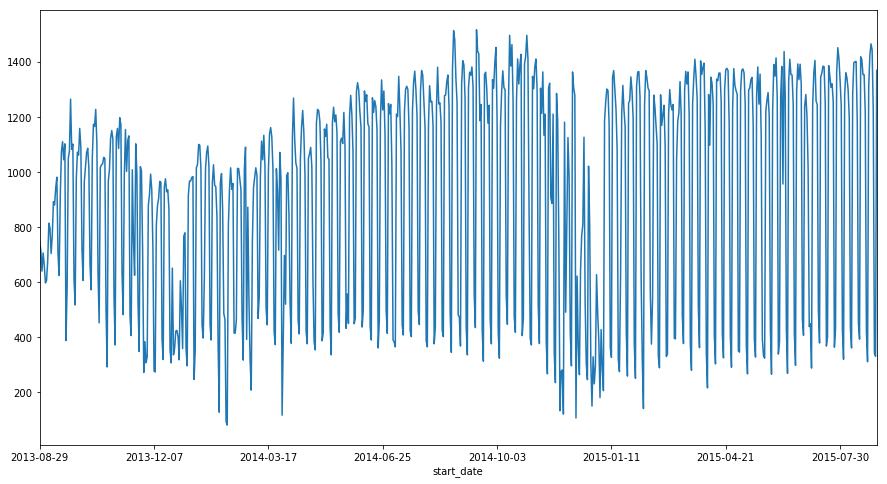

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#fig.set_size_inches(18.5, 10.5)
periodo.duration.plot(kind='line')
# matplotlib.rcParams['figure.figsize'] = [20, 10]

In [6]:
station_info = pd.read_csv('stations_full.csv')

In [7]:
stations_by_city = station_info.loc[:, ('name', 'landmark')]
stations_by_city.head()

,name,landmark
0,San Jose Diridon Caltrain Station,San Jose
1,San Jose Civic Center,San Jose
2,Santa Clara at Almaden,San Jose
3,Adobe on Almaden,San Jose
4,San Pedro Square,San Jose


In [8]:
san_jose = []
san_francisco = []
redwood = []
palo_alto = []
mountain_view = []
for i, row in stations_by_city.iterrows():
    if row['landmark'] == 'San Jose':
        if not row['name'] in san_jose:
            san_jose.append(row['name'])
    if row['landmark'] == 'San Francisco':
        if not row['name'] in san_francisco:
            san_francisco.append(row['name'])
    if row['landmark'] == 'Redwood City':
        if not row['name'] in redwood:
            redwood.append(row['name'])
    if row['landmark'] == 'Palo Alto':
        if not row['name'] in palo_alto:
            palo_alto.append(row['name'])    
    if row['landmark'] == 'Mountain View':
        if not row['name'] in mountain_view:
            mountain_view.append(row['name'])
#station_info.head()
#city = station_info.landmark
#type(city)

In [9]:
city = san_francisco + san_jose + redwood + mountain_view + palo_alto

In [10]:
len(city)

72

In [11]:
matrix = np.zeros((72,72))

In [12]:
heatmap = pd.DataFrame(data=matrix, index=city, columns=city)

In [13]:
heatmap.tail()

,Powell Street BART,Clay at Battery,Davis at Jackson,Commercial at Montgomery,Washington at Kearney,Post at Kearney,Embarcadero at Vallejo,Spear at Folsom,Harry Bridges Plaza (Ferry Building),Embarcadero at Folsom,...,San Antonio Caltrain Station,Evelyn Park and Ride,San Antonio Shopping Center,Castro Street and El Camino Real,Rengstorff Avenue / California Street,Palo Alto Caltrain Station,University and Emerson,California Ave Caltrain Station,Cowper at University,Park at Olive
Palo Alto Caltrain Station,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
University and Emerson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
California Ave Caltrain Station,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cowper at University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Park at Olive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
not_city = []
for i, row in trip_data.iterrows():
    if not row['start_city'] in city:
        if not row['start_city'] in not_city:
            not_city.append(row['start_city'])
print not_city
#    heatmap.loc[row['start_city'], row['end_city']] += 1

['Post at Kearny', 'Washington at Kearny']


In [15]:
for i, row in trip_data.iterrows():
    if (row['start_city'] != 'Post at Kearny') and (row['start_city'] != 'Washington at Kearny'):
        if (row['end_city'] != 'Post at Kearny') and (row['end_city'] != 'Washington at Kearny'):
            heatmap.loc[row['start_city'], row['end_city']] += 1

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.imshow(heatmap, cmap='binary', interpolation='nearest')
plt.show()

In [ ]:
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)

In [ ]:
duration_series = trip_data.duration
duration_series
for i in duration_series:
    print i
    break

In [ ]:
# max = 287840 ~ 30000
# dividir em 10 intervalos de tempo: 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 30000 
duration_step = []
step1 = 0
step2 = 0
step3 = 0
step4 = 0
step5 = 0
step6 = 0
step7 = 0
step8 = 0
step9 = 0
step10 = 0
for i in trip_data.duration:
    if i >= 27000:
        step10 += 1
    elif i >= 24000:
        step9 += 1
    elif i >= 21000:
        step8 += 1
    elif i >= 18000:
        step7 += 1
    elif i >= 15000:
        step6 += 1
    elif i >= 12000:
        step5 += 1
    elif i >= 9000:
        step4 += 1
    elif i >= 6000:
        step3 += 1
    elif i >= 3000:
        step2 += 1
    else:
        step1 += 1

duration_step = [step1, step2, step3, step4, step5, step6, step7, step8, step9, step10]
        
duration_step

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = 5
data = np.array(range(n)) + np.random.rand(n)

fig, ax = plt.subplots(4, figsize=(6, 12))

bar_locations = np.arange(n)
ax[0].bar(bar_locations, data)
ax[1].bar(bar_locations, data, color='red')

ax[2].bar(bar_locations, data, color=['red', 'blue'])

colors = ['#624ea7', 'g', 'yellow', 'k', 'maroon']
ax[3].bar(bar_locations, data, color=colors)

fig.show()
